# Lecture 3 worksheet solutions

### Problem 1 (True/False)

Indicate whether each of the following statements is True or False.

1. Only continuous random variables can be converted into $p$-values.

**Answer:** False. Any distribution on the real line can be converted into $p$-values. Recall the definition $P = F(X)$, where $F$ is the CDF for $X$.

2. The family-wise error rate (FWER) is always larger than or equal to the false discovery rate.

**Answer:** True.

Let $n_{01}$ denote the number of false positives, and $n_{11}$ denote the number of true positives. Note that these are now *random variables* rather than fixed numbers, as was the case in Lecture 2. Then $\text{FWER} = \mathbb{P}\{n_{01} \geq 1\}$ and $\text{FDR} = \mathbb{E}\left\{\frac{n_{01}}{n_{01}+n_{11}}\right\}$.

Since $\frac{n_{01}}{n_{01}+n_{11}} \leq 1\left\{\frac{n_{01}}{n_{01}+n_{11}} > 0\right\} \leq 1\{n_{01} \geq 1\}$, we can take expectations to get $\text{FWER} \geq \text{FDR}$.

3. The Benjamini-Hochberg procedure controls the FWER.

**Answer:** False. It controls the FDR.

4. The Benjamini-Hochberg procedure requires the null $p$-values to be independent.

**Answer:** True. The FDR control does not hold if we do not assume the null $p$-values to be independent. The non-nulls are allowed to have arbitrary dependence structure.

### Problem 2 (Bonferroni method and union bound)

1. Explain in words what the family-wise error rate (FWER) is.

**Answer:** It is the probability that there is at least one false positive.

2. The [Bonferroni method](https://youtu.be/NHRNAjLJi0E?t=100) makes use of the [union bound](https://en.wikipedia.org/wiki/Boole%27s_inequality) to bound the probability of a union of events, $E_1,E_2,\ldots E_m$. Under what conditions on the $E_i$’s is this inequality an equality, in other words, when does the following hold:
$$
\sum_{i=1}^m \mathbb{P}(E_i) = \mathbb{P}(\cup_{i=1}^m E_i).
$$

**Answer:** This holds when the $E_i$ 's are disjoint events.

3. Assume $P(E_i) = p$ for $i=1,\ldots,m$. What conditions on the $E_i$'s make this bound as loose as possible? In other words, when is $\sum_{i=1}^m \mathbb{P}(E_i) - \mathbb{P}(\cup_{i=1}^m E_i)$ maximized? 

**Answer:** This quantity is maximized when all $E_i$'s are the same event, i.e. $E_i = E$ for $i=1,\ldots,m$. Then $\sum_{i=1}^m \mathbb{P}(E_i) = mp$, but $\mathbb{P}(\cup_{i=1}^m E_i) = p$.

### Problem 3 (Implementing Bonferroni and Benjamini-Hochberg)

Suppose that we are given 8 $p$-values: 0.013, 0.08, 0.0004, 0.027, 0.05, 0.17, 0.009, 0.026. This exercise will guide you in implementing the two procedures described in the lecture.

1. Suppose we desire a FWER of 0.05. What is the Bonferroni threshold?

**Answer:**

In [1]:
alpha = 0.05
threshold = alpha/8
threshold

0.00625

2. How many hypotheses are rejected if we apply Bonferroni?

In [2]:
import numpy as np

p_vals = np.array([0.013, 0.08, 0.0004, 0.027, 0.05, 0.17, 0.009, 0.026])
num_rejects = np.sum(p_vals <= threshold)
num_rejects

1

**Answer:**

3. Fill in the following function that implements the BH procedure

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

def apply_BH(p_values, alpha):
    """
    Returns the number of rejected hypotheses.
    
    """
    
    m = len(p_values)
    sorted_p_vals = np.sort(p_values)
    comparison_vals = (np.arange(m)+1) * alpha / m
    comparisons = sorted_p_vals <= comparison_vals
    # max_k is the maximum index of a sorted p-value lying below the threshold
    # Hint: Be careful of zero-indexing! p-values are indexed starting from 1
    max_k = max(np.arange(len(p_values))[comparisons]) + 1 # After adjusting for zero-indexing, max_k is the index of the last True value

# ---- Uncomment in order to see BH plot -----    
    plt.figure(figsize = (5,5))
    plt.xlim([0,m])
    plt.ylim([0,0.1])
    plt.plot([0, m], [0, alpha])
    plt.scatter(np.arange(m)+1, sorted_p_vals, c = "k", label = "Accepted p-values")
    plt.scatter((np.arange(m)+1)[:max_k], sorted_p_vals[:max_k], c = "b", label = "Rejected p-values")
    plt.legend()
    plt.show()
    
    return max_k

4. Apply the function to determine how many hypotheses are rejected if we apply BH with $\alpha = 0.05$ and $\alpha = 0.01$.

**Answer:**

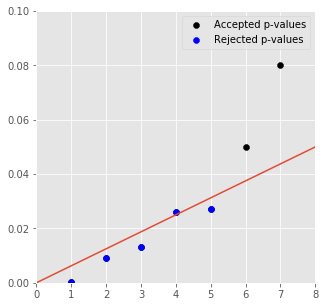

5

In [15]:
apply_BH(p_vals, 0.05)

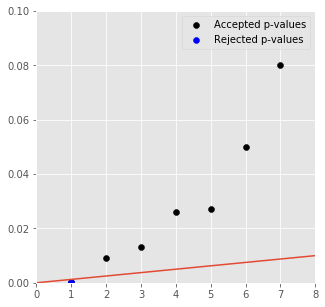

1

In [16]:
apply_BH(p_vals, 0.01)